Dataset loaded successfully.

--- Dataset Overview ---
Dataset Shape: (367, 12)

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Missing Values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

--- Statistical Summary ---
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136

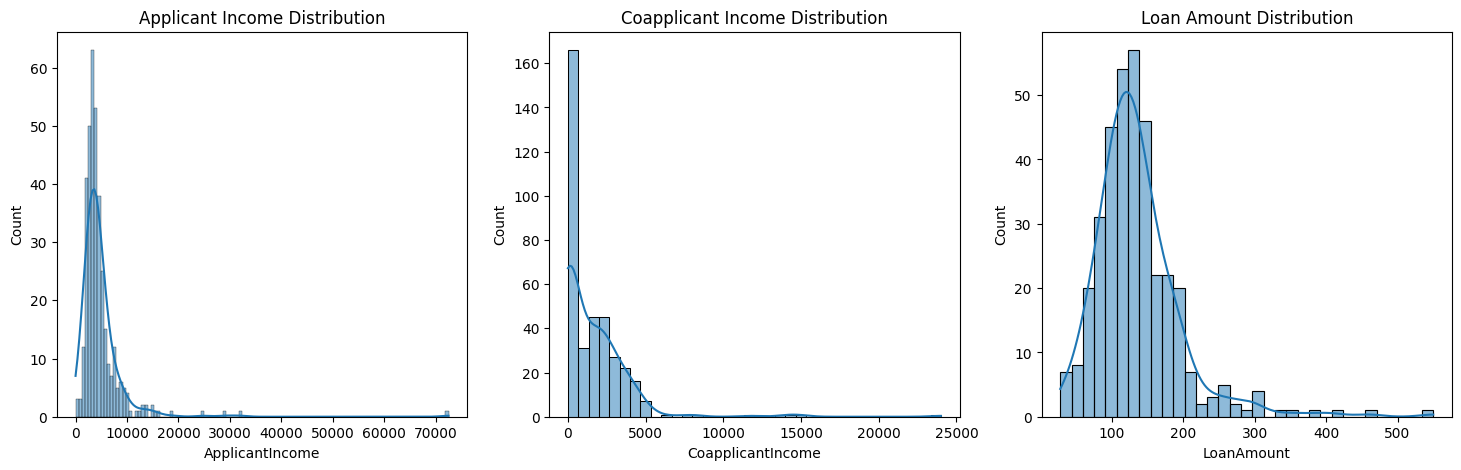

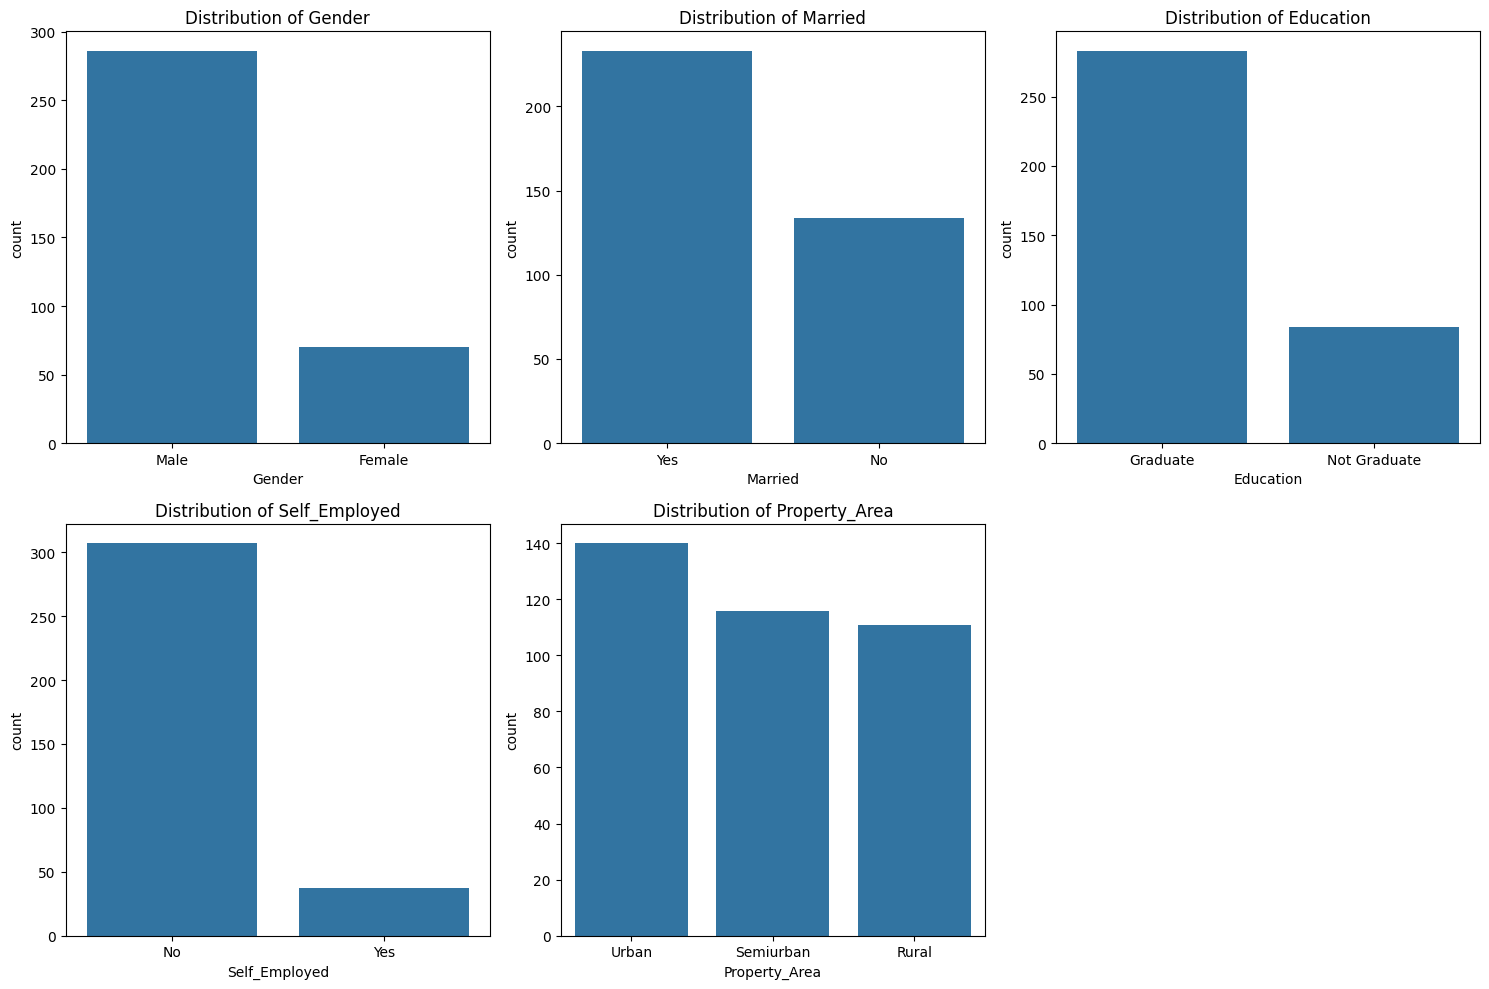

Skipping relationship analysis plots with 'Loan_Status' because the column is not found.


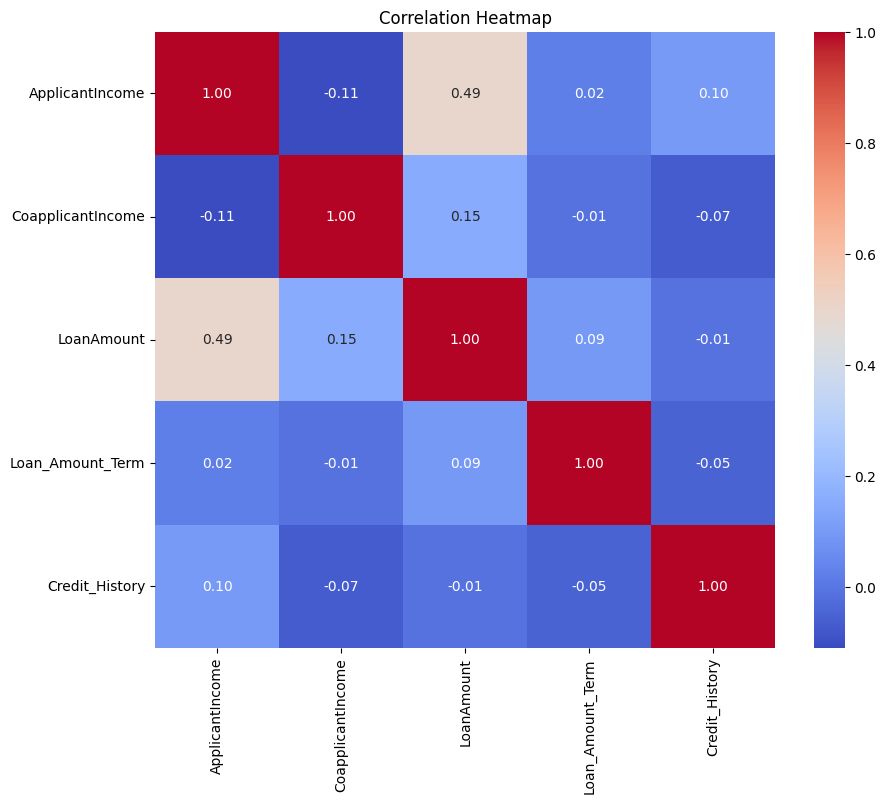


Skipping Model Training, Selection, and Visualization due to missing 'Loan_Status' column. Please provide a dataset with 'Loan_Status' if you wish to run the full machine learning pipeline.


/tmp/ipython-input-3275306222.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-3275306222.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load the dataset
# Assuming 'train.csv' is in the current directory
try:
    df = pd.read_csv('/content/loan pred.csv') # Changed 'train.csv' to 'loan pred.csv'
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: loan pred.csv not found. Please ensure the file is in the same directory.")
    # Exit or handle the error gracefully if the file is essential for subsequent steps
    exit() # Added exit to prevent NameError in subsequent steps

# 2. Exploratory Data Analysis (EDA)
print("\n--- Dataset Overview ---")
print(f"Dataset Shape: {df.shape}")
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

print("\n--- Statistical Summary ---")
print(df.describe())

# Distribution Plots for Numerical Features
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Coapplicant Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'].dropna(), kde=True)
plt.title('Loan Amount Distribution')
plt.show()

# Count Plots for Categorical Features
# Define categorical_cols list for EDA, ensuring 'Loan_Status' is included only if it exists in df
plot_cat_features = [col for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] if col in df.columns]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(plot_cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Relationship Analysis (conditional on 'Loan_Status' presence)
if 'Loan_Status' in df.columns:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
    plt.title('Loan Status vs Credit History')

    plt.subplot(1, 3, 2)
    sns.countplot(data=df, x='Education', hue='Loan_Status')
    plt.title('Loan Status vs Education')

    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
    plt.title('Loan Status vs Property Area')
    plt.show()
else:
    print("Skipping relationship analysis plots with 'Loan_Status' because the column is not found.")

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Data Preprocessing
# Handling Missing Values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Dropping Loan_ID as it's just an identifier
df.drop('Loan_ID', axis=1, inplace=True)

# Encoding Categorical Variables
le = LabelEncoder()
# Define categorical_cols for encoding, ensuring 'Loan_Status' is included only if it exists
actual_categorical_cols_for_encoding = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

has_loan_status = False
if 'Loan_Status' in df.columns:
    actual_categorical_cols_for_encoding.append('Loan_Status')
    has_loan_status = True
else:
    print("Warning: 'Loan_Status' column not found for encoding. Proceeding with available categorical features.")

for col in actual_categorical_cols_for_encoding:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Skipping encoding for '{col}' as it's not in the DataFrame.")


if has_loan_status:
    # Splitting Features and Target
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 4. Model Training and Comparison
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1
        })

    results_df = pd.DataFrame(results)
    print("\n--- Model Performance Comparison ---")
    print(results_df.sort_values(by='F1-score', ascending=False))

    # 5. Best Model Selection
    best_model_name = results_df.iloc[results_df['F1-score'].idxmax()]['Model']
    best_model = models[best_model_name]
    print(f"\nBest Model Selected: {best_model_name}")

    # 6. Visualization for Best Model
    # Confusion Matrix
    y_pred_best = best_model.predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {best_model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance (for Tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        importances = pd.Series(best_model.feature_importances_, index=X.columns)
        plt.figure(figsize=(10, 6))
        importances.sort_values().plot(kind='barh')
        plt.title(f'Feature Importance: {best_model_name}')
        plt.show()
else:
    print("\nSkipping Model Training, Selection, and Visualization due to missing 'Loan_Status' column. Please provide a dataset with 'Loan_Status' if you wish to run the full machine learning pipeline.")